# TC data sample comparisons: 
We need to compare groups of indicators taken from Transparent cities Transparency dataset. The gropus are based on two criteria:
1. Complex vs simple indicators: a simple indicator takemes little to moderate effort to implement and is valued at 1 point max. A complex indicator takes more effort to implement and is valued at 2 points max. Read the latest Transparency methodology at http://transparentcities.in.ua for more.
2. Imperative vs non-imperative indicators: contents of an indicator may either be regulated by law (imperative) or be purely recommendational (non-imperative). A middle-ground case is when an indicator may be based on the legislation when implemented one way and may not in another.

This notebook is devoted to the complex vs simple comparison. Our goals are:
- To see if their means differ
- To see if the differences are statisically significant.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [2]:
#load the dataset
data = pd.read_excel("G:/My Drive/Особисті доки/Прозорість/210903 зведена база 2020.xlsx")

Let's add a binary variable for complexity.

In [3]:
data['complexity'] = data['maxPoint'].map({1.0:'simple', 2.0:'complex'})
#check if the operation went well - there should be two categories
data['complexity'].unique()

array(['simple', 'complex'], dtype=object)

We will not compare absolute scores (which obviously differ a lot) but the average % of completion, measured as city's point divided by maximum point.

In [5]:
data['percent_implemeted'] = data['point']/data['maxPoint']

Calculate mean of both groups

In [14]:
print(f'Mean implementation of simple indicators: {data[data["complexity"]=="simple"]["percent_implemeted"].mean()*100}%')
print(f'Mean implementation of simple indicators: {data[data["complexity"]=="complex"]["percent_implemeted"].mean()*100}%')

Mean implementation of simple indicators: 42.80715171906232%
Mean implementation of simple indicators: 33.2421875%


## Normality test
Now that we know the difference of averages is about 10%, let's check the distributions within our "complex" and "simple" groups. Based on the distributions, we'll decide if we should use parametric or non-parametric test to assess the significance.

In [7]:
# for simple indicators
stats.normaltest(data[data['complexity']=='simple']['percent_implemented'])

NormaltestResult(statistic=134307.81210266633, pvalue=0.0)

In [8]:
#for complex indicators
stats.normaltest(data[data['complexity']=='complex']['percent_implemented'])

NormaltestResult(statistic=958.8718971194835, pvalue=6.075934934167223e-209)

The test has shown that the distributions are as far from normal as it gets. Let's see how they look.

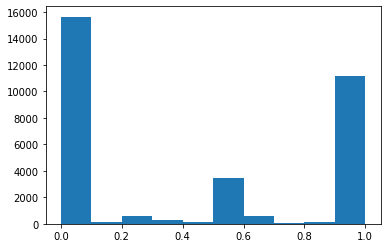

In [44]:
np.random.seed(1)
plt.hist(data[data['complexity']=='simple']['percent_implemented'])
plt.show()

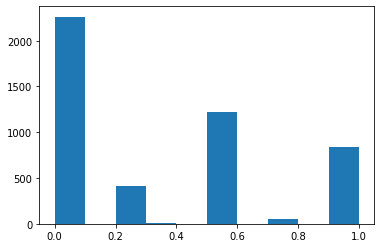

In [46]:
np.random.seed(1)
plt.hist(data[data['complexity']=='complex']['percent_implemented'])
plt.show()